## PARÁMETROS Y ESTRUCTURA DE CARPETAS

In [47]:
import os
from datetime import datetime

### 1. Parámetros editables por el Brand Manager

In [48]:
params = {'brand': 'Allegra K', 'start_date': '2024-10-01', 'end_date': '2025-09-30'}

### 2. Crear carpeta de salida con timestamp

In [49]:
today = datetime.today().strftime('%Y%m%d')  # formato YYYYMMDD
folder_name = f"{today}_brand_{params['brand'].replace(' ', '_')}"  # reemplaza espacios por _
output_path = os.path.join("output", folder_name)

### 3. Crear carpeta

In [50]:
os.makedirs(output_path, exist_ok=True)

### 4. Mostrar ruta para confirmar

In [95]:
print(f" Carpeta de salida creada: {output_path}")

 Carpeta de salida creada: output/20251026_brand_Allegra_K


## CONEXIÓN Y CONSULTA A BIGQUERY

In [52]:
from google.cloud import bigquery

### 1. Crear cliente de BigQuery

In [53]:
client = bigquery.Client()

### 2. Función para cargar y parametrizar la query desde el archivo

In [54]:
def load_sql_with_params(sql_file, params):
    with open(sql_file, 'r') as file:
        sql = file.read()

    # Reemplazar los placeholders
    sql = sql.replace('{brand}', f"'{params['brand']}'")
    sql = sql.replace('{start_date}', f"'{params['start_date']}'")
    sql = sql.replace('{end_date}', f"'{params['end_date']}'")
    
    return sql

### 3. Cargar y preparar la consulta

In [55]:
query_path = "query.sql" # ruta al archivo SQL
sql = load_sql_with_params(query_path, params)
print(sql)

SELECT
  oi.order_id,
  o.user_id,
  u.country,
  oi.product_id,
  p.category,
  p.brand,
  p.cost,
  oi.sale_price,
  oi.created_at
FROM `bigquery-public-data.thelook_ecommerce.order_items` AS oi
JOIN `bigquery-public-data.thelook_ecommerce.products` AS p
  ON oi.product_id = p.id
JOIN `bigquery-public-data.thelook_ecommerce.orders` AS o
  ON oi.order_id = o.order_id
JOIN `bigquery-public-data.thelook_ecommerce.users` AS u
  ON o.user_id = u.id
WHERE p.brand = 'Allegra K'
  AND oi.created_at BETWEEN '2024-10-01' AND '2025-09-30'


## Ejecutar la SQL en BigQuery y guardar en un DataFrame

In [56]:
 from google.cloud import bigquery

### 1. Crear el cliente de BigQuery

In [57]:
client = bigquery.Client()

### 2. Ejecutar la consulta SQL y convertir el resultado a DataFrame

In [58]:
df = client.query(sql).to_dataframe()

In [59]:
df.head()

,order_id,user_id,country,product_id,category,brand,cost,sale_price,created_at
0,66398,52956,China,12659,Intimates,Allegra K,1.76792,3.28,2025-09-09 05:50:27+00:00
1,83949,66897,United States,12580,Intimates,Allegra K,1.71533,3.37,2025-07-26 09:27:11+00:00
2,107572,85651,United Kingdom,12657,Intimates,Allegra K,1.77297,3.39,2025-08-01 15:05:38+00:00
3,38029,30297,China,12657,Intimates,Allegra K,1.77297,3.39,2024-10-23 01:31:58+00:00
4,50534,40251,China,12657,Intimates,Allegra K,1.77297,3.39,2025-06-25 02:15:20+00:00


## Análisis 1 - Performance Temporal — Evolución Mensual

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Asegurar que la columna de fechas está en formato datetime

In [61]:
df.columns.tolist()

['order_id',
 'user_id',
 'country',
 'product_id',
 'category',
 'brand',
 'cost',
 'sale_price',
 'created_at']

In [62]:
sql = load_sql_with_params("query.sql", params)
df = client.query(sql).to_dataframe()

In [63]:
df

,order_id,user_id,country,product_id,category,brand,cost,sale_price,created_at
0,66398,52956,China,12659,Intimates,Allegra K,1.767920,3.280000,2025-09-09 05:50:27+00:00
1,83949,66897,United States,12580,Intimates,Allegra K,1.715330,3.370000,2025-07-26 09:27:11+00:00
2,107572,85651,United Kingdom,12657,Intimates,Allegra K,1.772970,3.390000,2025-08-01 15:05:38+00:00
3,38029,30297,China,12657,Intimates,Allegra K,1.772970,3.390000,2024-10-23 01:31:58+00:00
4,50534,40251,China,12657,Intimates,Allegra K,1.772970,3.390000,2025-06-25 02:15:20+00:00
...,...,...,...,...,...,...,...,...,...
2314,65491,52236,France,24437,Outerwear & Coats,Allegra K,16.458799,35.779999,2025-01-27 12:50:43+00:00
2315,70398,56055,Brasil,24437,Outerwear & Coats,Allegra K,16.458799,35.779999,2025-03-29 15:28:24+00:00
2316,89003,70911,China,24055,Outerwear & Coats,Allegra K,15.624510,37.290001,2025-06-14 17:55:39+00:00
2317,49339,39301,United States,17719,Fashion Hoodies & Sweatshirts,Allegra K,19.542600,37.799999,2025-01-05 23:35:40+00:00


### 1. Asegurar que la columna de fechas está en formato datetime

In [64]:
df['created_at'] = pd.to_datetime(df['created_at'])

### 2. Crear columna de mes (formato año-mes)

In [65]:
df['month'] = df['created_at'].dt.to_period('M').astype(str)

/var/tmp/ipykernel_7504/3869259029.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M').astype(str)


### 3. Calcular profit (venta - coste)

In [66]:
df['profit'] = df['sale_price'] - df['cost']

### 4. Agrupar por mes y calcular métricas

In [67]:
monthly = df.groupby('month').agg({'sale_price': 'sum', 'order_id': pd.Series.nunique, 'user_id': pd.Series.nunique, 'profit': 'sum'}).rename(columns={
'sale_price': 'revenue', 'order_id': 'unique_orders','user_id': 'unique_customers'})

### 5. Calcular AOV

In [68]:
monthly['AOV'] = monthly['revenue'] / monthly['unique_orders']

### 6. Calcular tasa de crecimiento mensual de revenue (%)

In [69]:
monthly['revenue_growth'] = monthly['revenue'].pct_change() * 100

### 7. Reset index 

In [70]:
monthly.reset_index(inplace=True)

### 8. Guardar CSV

In [71]:
csv_path = os.path.join(output_path, "1_monthly_performance.csv")
monthly.to_csv(csv_path, index=False)

In [94]:
print(f" CSV exportado: {csv_path}")

 CSV exportado: output/20251026_brand_Allegra_K/2_category_analysis.csv


## GRÁFICO

### 1. Crear gráfico de línea: evolución del revenue mensual

In [73]:
import matplotlib.pyplot as plt
import os

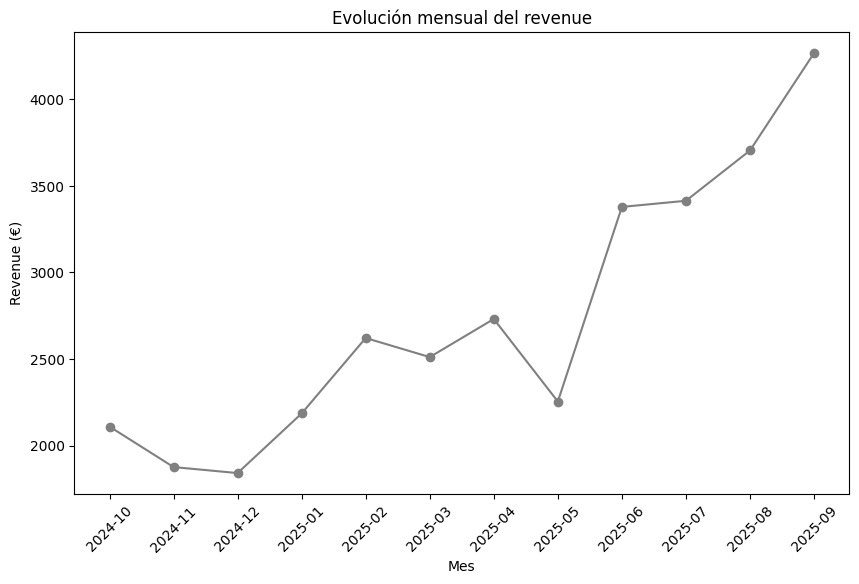

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly['month'], monthly['revenue'], marker='o', color='gray')
ax.set_title('Evolución mensual del revenue')
ax.set_xlabel('Mes')
ax.set_ylabel('Revenue (€)')
ax.tick_params(axis='x', rotation=45)

### 2. Guardar como PNG

In [103]:
png_path = os.path.join(output_path, "1_monthly_performance.png")
fig.tight_layout()
fig.savefig(png_path, bbox_inches='tight')
plt.close(fig)

print(f" Gráfico exportado correctamente en: {png_path}")

 Gráfico exportado correctamente en: output/20251026_brand_Allegra_K/1_monthly_performance.png


## Análisis 2 - Top 10 categorías por revenue


### 1. Calcular profit 

In [76]:
df['profit'] = df['sale_price'] - df['cost']

### 2. Agrupar por categoría

In [77]:
categories = df.groupby('category').agg({ 'sale_price': 'sum', 'order_id': pd.Series.nunique, 'profit': 'sum'}).rename(columns={'sale_price': 'revenue', 'order_id': 'unique_orders', 'profit': 'total_profit'})

### 3. Ordenar por revenue descendente y para quedarnos con el top 10

In [78]:
top_categories = categories.sort_values(by='revenue', ascending=False).head(10).reset_index()

### 4. Exportar a CSV

In [92]:
csv_path = os.path.join(output_path, "2_category_analysis.csv")
top_categories.to_csv(csv_path, index=False)
print(f" CSV exportado: {csv_path}")

 CSV exportado: output/20251026_brand_Allegra_K/2_category_analysis.csv


## GRÁFICO

### 1. Crear gráfico de barras horizontales

In [80]:
import matplotlib.pyplot as plt

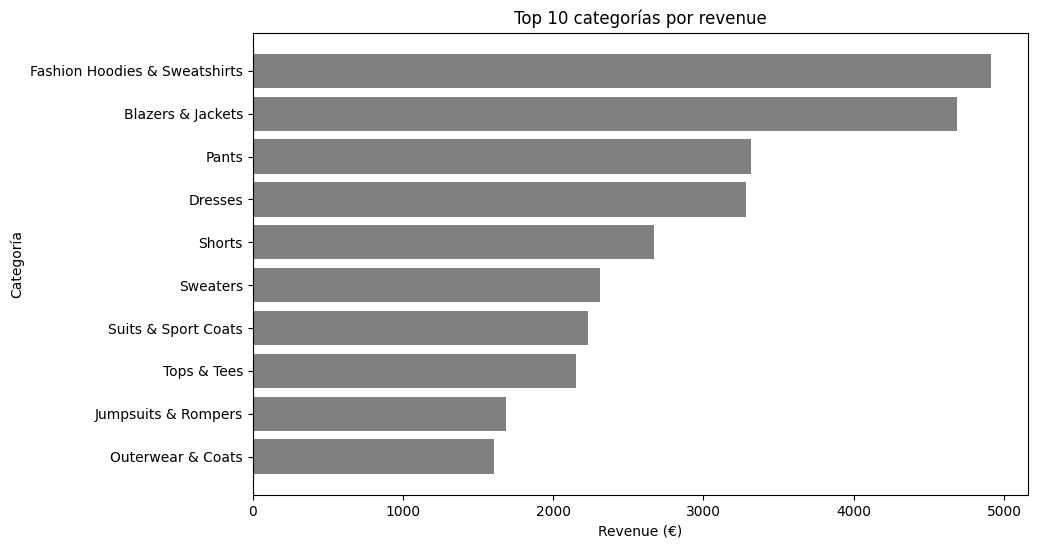

In [104]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_categories['category'], top_categories['revenue'], color='gray')
ax.set_title('Top 10 categorías por revenue')
ax.set_xlabel('Revenue (€)')
ax.set_ylabel('Categoría')
ax.invert_yaxis() 

### 2. Exportar como imagen PNG

In [105]:
png_path = os.path.join(output_path, "2_category_analysis.png")
fig.tight_layout()
fig.savefig(png_path, bbox_inches='tight')
plt.close(fig)

print(f" Gráfico exportado: {png_path}")

 Gráfico exportado: output/20251026_brand_Allegra_K/2_category_analysis.png


## Análisis 3 - Top 10 países por revenue

### 1. Calcular por país

In [85]:
geo = df.groupby('country').agg({'sale_price': 'sum', 'user_id': pd.Series.nunique, 'order_id': pd.Series.nunique}).rename(columns={'sale_price': 'revenue', 'user_id': 'unique_customers', 'order_id': 'unique_orders'})

### 2. Ordenar por revenue para quedarnos con el top 10

In [88]:
top_countries = geo.sort_values(by='revenue', ascending=False).head(10).reset_index()

### 3. Exportar CSV

In [90]:
csv_path = os.path.join(output_path, "3_geographic_analysis.csv")
top_countries.to_csv(csv_path, index=False)
print(f" CSV exportado: {csv_path}")

 CSV exportado: output/20251026_brand_Allegra_K/3_geographic_analysis.csv


## GRÁFICO

### 1. Crear gráfico de barras verticales

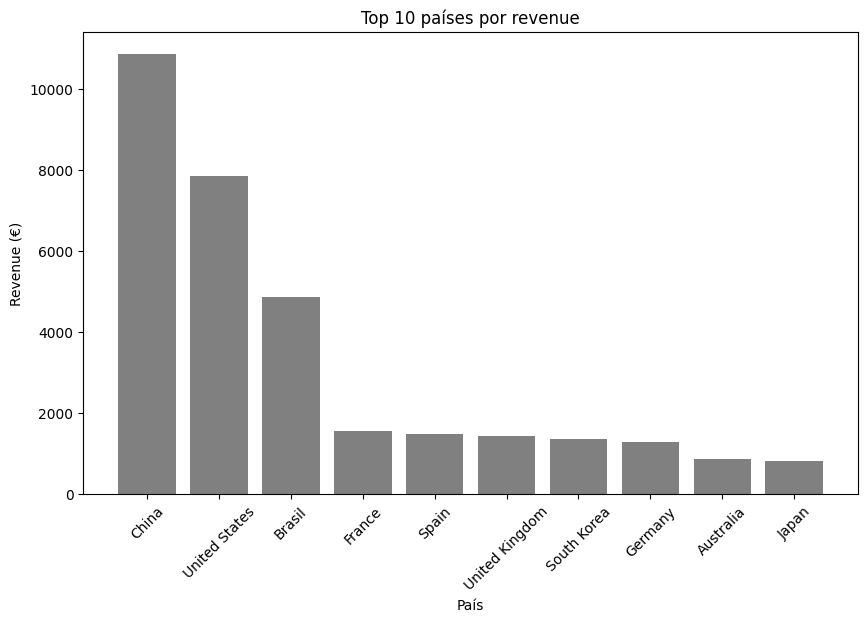

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_countries['country'], top_countries['revenue'], color='gray')
ax.set_title('Top 10 países por revenue')
ax.set_xlabel('País')
ax.set_ylabel('Revenue (€)')
ax.tick_params(axis='x', rotation=45)

### 2. Exportar como imagen PNG

In [107]:
png_path = os.path.join(output_path, "3_geographic_analysis.png")
fig.tight_layout()
fig.savefig(png_path, bbox_inches='tight')
plt.close(fig)

print(f" Gráfico exportado: {png_path}")

 Gráfico exportado: output/20251026_brand_Allegra_K/3_geographic_analysis.png


## Análisis 4 - Distribución de precios

### 1. Calcular las estadísticas

In [111]:
stats = df['sale_price'].describe()

In [112]:
print(stats)

count    2319.000000
mean       14.184920
std         5.169970
min         3.280000
25%        10.645000
50%        13.020000
75%        16.720000
max        37.799999
Name: sale_price, dtype: float64


In [115]:
stats_df = stats.to_frame()

In [116]:
stats_df

,sale_price
count,2319.000000
mean,14.184920
std,5.169970
min,3.280000
25%,10.645000
50%,13.020000
75%,16.720000
max,37.799999


### 2. Exportar CSV

In [118]:
csv_path = os.path.join(output_path, "4_price_distribution.csv")
stats_df.to_csv(csv_path, index=False)

print(f" CSV simple exportado: {csv_path}")

 CSV simple exportado: output/20251026_brand_Allegra_K/4_price_distribution.csv


### GRÁFICO

### 1. Crear histograma de precios

Text(0, 0.5, 'Frecuencia')

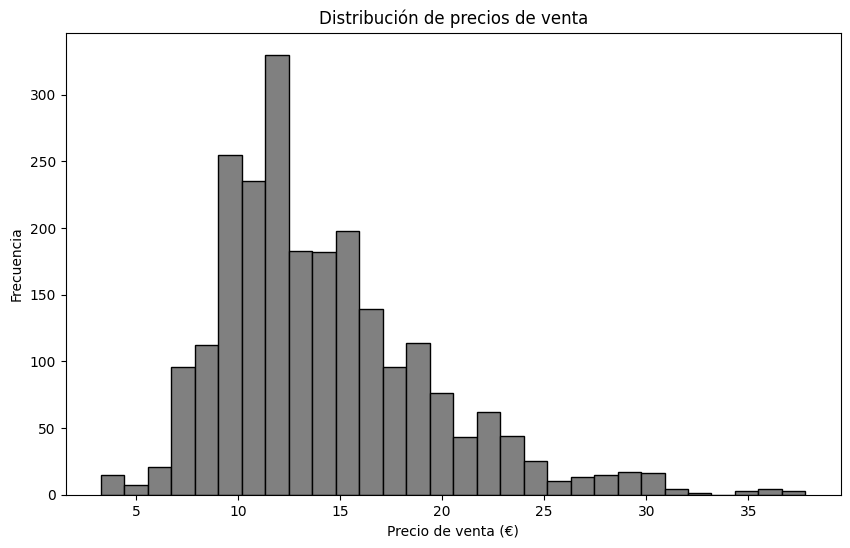

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['sale_price'], bins=30, color='gray', edgecolor='black')
ax.set_title('Distribución de precios de venta')
ax.set_xlabel('Precio de venta (€)')
ax.set_ylabel('Frecuencia')

### 2. Exportar como imagen PNG

In [122]:
png_path = os.path.join(output_path, "4_price_distribution.png")
fig.tight_layout()
fig.savefig(png_path, bbox_inches='tight')
plt.close(fig)

print(f" Histograma exportado: {png_path}")

 Histograma exportado: output/20251026_brand_Allegra_K/4_price_distribution.png
